In [1]:
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import matplotlib
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']
plt.rcParams['mathtext.default'] = 'regular'

In [2]:
net_power = pd.read_excel('GB_System.xlsx', sheet_name=None)
Dem_unit = net_power['dem'].values[:,-48:]
demand_sol = np.sum(Dem_unit, axis=0)

Dispatch_Umg = pd.read_excel('result_unmanaged.xlsx', 'dispatch').values
Genmix_Umg = pd.read_excel('result_unmanaged.xlsx', 'genmix').values[:,0]
EV_Umg = pd.read_excel('result_unmanaged.xlsx', 'ev').values
Carbon_Umg = pd.read_excel('result_unmanaged.xlsx', 'carbon').values

Dispatch_Cen = pd.read_excel('result_centralised.xlsx', 'dispatch').values
Genmix_Cen = pd.read_excel('result_centralised.xlsx', 'genmix').values[:,0]
EV_Cen = pd.read_excel('result_centralised.xlsx', 'ev').values
Carbon_Cen = pd.read_excel('result_centralised.xlsx', 'carbon').values

Dispatch_Pro = pd.read_excel('result_proposed.xlsx', 'dispatch').values
Genmix_Pro = pd.read_excel('result_proposed.xlsx', 'genmix').values[:,0]
EV_Pro = pd.read_excel('result_proposed.xlsx', 'ev').values
Carbon_Pro = pd.read_excel('result_proposed.xlsx', 'carbon').values
#Carbon_Pro = pd.read_excel('result_proposed - org.xlsx', 'carbon').values

# Dispatch

C:\Users\Dawei Qiu\anaconda3\lib\site-packages\ipykernel_launcher.py:21: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
C:\Users\Dawei Qiu\anaconda3\lib\site-packages\ipykernel_launcher.py:46: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
C:\Users\Dawei Qiu\anaconda3\lib\site-packages\ipykernel_launcher.py:71: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.


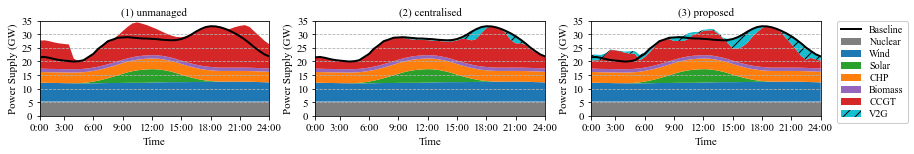

In [3]:
fig = plt.figure(figsize = (14,1.75))
grid = plt.GridSpec(1,3, wspace=0.2, hspace=0.0)

x = range(48)
line_width = 2
space = 0.2
text1 = 10
text2 = 11
font1 = {'family': 'Times New Roman', 'weight': 'normal', 'size': text1}
font2 = {'family': 'Times New Roman', 'weight': 'normal', 'size': text2}

# Unmanageed
ax = fig.add_subplot(grid[0,0])
sources = ['Nuclear', 'Wind', 'Solar', 'CHP', 'Biomass', 'CCGT']
colors = ['tab:gray', 'tab:blue', 'tab:green', 'tab:orange', 'tab:purple', 'tab:red']
nuclear_sol, wind_sol, solar_sol, chp_sol = Dispatch_Umg[0], Dispatch_Umg[1], Dispatch_Umg[2], Dispatch_Umg[3]  
biomass_sol, ccgt_sol = Dispatch_Umg[4], Dispatch_Umg[5]
plt.plot(x, demand_sol, '-', color='black', label='Baseline', linewidth=line_width)
stacks = plt.stackplot(x, nuclear_sol, wind_sol, solar_sol, chp_sol, biomass_sol, ccgt_sol,                       
                       labels=sources, colors=colors)
plt.grid(b=None, which='major', linestyle='--', axis='y')
plt.tick_params(labelsize = text2)
plt.xticks(np.linspace(0,47,11), fontname = "Times New Roman")
plt.xticks([0,5,11,17,23,29,35,41,47],['0:00','3:00','6:00','9:00','12:00','15:00','18:00','21:00','24:00'])
plt.yticks(np.linspace(0,35000,8), fontname = "Times New Roman")
plt.yticks([0,5000,10000,15000,20000,25000,30000,35000],[0,5,10,15,20,25,30,35])
plt.xlim([0,47])
plt.ylim([0,35000])
plt.ylabel('Power Supply (GW)', font2)
plt.xlabel('Time', font2)
plt.title('(1) unmanaged', font2, loc='center')
hatches = ['','','','','','']
for stack, hatch in zip(stacks, hatches):
    stack.set_hatch(hatch)

# Centralised
ax = fig.add_subplot(grid[0,1])
sources = ['Nuclear', 'Wind', 'Solar', 'CHP', 'Biomass', 'CCGT', 'V2G']
colors = ['tab:gray', 'tab:blue', 'tab:green', 'tab:orange', 'tab:purple', 'tab:red','tab:cyan']
nuclear_sol, wind_sol, solar_sol, chp_sol = Dispatch_Cen[0], Dispatch_Cen[1], Dispatch_Cen[2], Dispatch_Cen[3] 
biomass_sol, ccgt_sol = Dispatch_Cen[4], Dispatch_Cen[5] 
ev_discharge_sol = Dispatch_Cen[6]
plt.plot(x, demand_sol, '-', color='black', label='Baseline', linewidth=line_width)
stacks = plt.stackplot(x, nuclear_sol, wind_sol, solar_sol, chp_sol, biomass_sol, ccgt_sol, ev_discharge_sol,
                       labels=sources, colors=colors)
plt.grid(b=None, which='major', linestyle='--', axis='y')
plt.tick_params(labelsize = text2)
plt.xticks(np.linspace(0,47,11), fontname = "Times New Roman")
plt.xticks([0,5,11,17,23,29,35,41,47],['0:00','3:00','6:00','9:00','12:00','15:00','18:00','21:00','24:00'])
plt.yticks(np.linspace(0,35000,8), fontname = "Times New Roman")
plt.yticks([0,5000,10000,15000,20000,25000,30000,35000],[0,5,10,15,20,25,30,35])
plt.xlim([0,47])
plt.ylim([0,35000])
plt.ylabel('Power Supply (GW)', font2)
plt.xlabel('Time', font2)
plt.title('(2) centralised', font2, loc='center')
hatches = ['','','','','','','//']
for stack, hatch in zip(stacks, hatches):
    stack.set_hatch(hatch)
    
# Proposed
ax = fig.add_subplot(grid[0,2])
sources = ['Nuclear', 'Wind', 'Solar', 'CHP', 'Biomass', 'CCGT', 'V2G']
colors = ['tab:gray', 'tab:blue', 'tab:green', 'tab:orange', 'tab:purple', 'tab:red','tab:cyan']
nuclear_sol, wind_sol, solar_sol, chp_sol = Dispatch_Pro[0], Dispatch_Pro[1], Dispatch_Pro[2], Dispatch_Pro[3] 
biomass_sol, ccgt_sol = Dispatch_Pro[4], Dispatch_Pro[5]
ev_discharge_sol = Dispatch_Pro[6]
plt.plot(x, demand_sol, '-', color='black', label='Baseline', linewidth=line_width)
stacks = plt.stackplot(x, nuclear_sol, wind_sol, solar_sol, chp_sol, biomass_sol, ccgt_sol, ev_discharge_sol,
                       labels=sources, colors=colors)
plt.grid(b=None, which='major', linestyle='--', axis='y')
plt.tick_params(labelsize = text2)
plt.xticks(np.linspace(0,47,11), fontname = "Times New Roman")
plt.xticks([0,5,11,17,23,29,35,41,47],['0:00','3:00','6:00','9:00','12:00','15:00','18:00','21:00','24:00'])
plt.yticks(np.linspace(0,35000,8), fontname = "Times New Roman")
plt.yticks([0,5000,10000,15000,20000,25000,30000,35000],[0,5,10,15,20,25,30,35])
plt.xlim([0,47])
plt.ylim([0,35000])
plt.ylabel('Power Supply (GW)', font2)
plt.xlabel('Time', font2)
plt.title('(3) proposed', font2)
hatches = ['','','','','','','//']
for stack, hatch in zip(stacks, hatches):
    stack.set_hatch(hatch)
    
legend = plt.legend(loc='upper left', prop=font1, labelspacing=space, framealpha=1, ncol=1, bbox_to_anchor=(1.05, 1.05))    
plt.savefig('Dispatch.pdf', bbox_inches='tight')
plt.show()

# EV Charging/Discharging

C:\Users\Dawei Qiu\anaconda3\lib\site-packages\ipykernel_launcher.py:22: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.


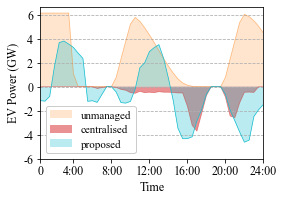

In [4]:
umg_ch = EV_Umg[:,0]
cen_ch, cen_disch = EV_Cen[0], EV_Cen[-1]
pro_ch, pro_disch = EV_Pro[0], EV_Pro[-1]
umg_ev = umg_ch
cen_ev = cen_ch + cen_disch
pro_ev = pro_ch + pro_disch

plt.figure(figsize = (4,2.8))
x = range(48)
line_width = 0.75
space = 0.4
text1 = 11
text2 = 12
font1 = {'family': 'Times New Roman', 'weight': 'normal', 'size': text1}
font2 = {'family': 'Times New Roman', 'weight': 'normal', 'size': text2}
plt.stackplot(x, umg_ev, labels=['unmanaged'], colors='tab:orange', alpha=0.2)
plt.stackplot(x, cen_ev, labels=['centralised'], colors='tab:red', alpha=0.5)
plt.stackplot(x, pro_ev, labels=['proposed'], colors='tab:cyan', alpha=0.3)
plt.plot(x, umg_ev, color='tab:orange', linewidth=line_width, alpha=0.5)
plt.plot(x, cen_ev, color='tab:red', linewidth=line_width, alpha=0.5)
plt.plot(x, pro_ev, color='tab:cyan', linewidth=line_width, alpha=1)
plt.grid(b=None, which='major', linestyle='--', axis='y')
plt.tick_params(labelsize = text2)
plt.xticks(np.linspace(0,47,7), fontname = "Times New Roman")
plt.xticks([0,7,15,23,31,39,47],['0','4:00','8:00','12:00','16:00','20:00','24:00'])
plt.yticks(np.linspace(-6000,6000,7), fontname = "Times New Roman")
plt.yticks([-6000,-4000,-2000,0,2000,4000,6000],['-6','-4','-2','0','2','4','6'])
plt.xlim([0,47])
plt.ylabel('EV Power (GW)', font2)
plt.xlabel('Time', font2)    
legend = plt.legend(loc='lower left', prop=font1, labelspacing=space, framealpha=1, ncol=1)
plt.savefig('EV.pdf', bbox_inches='tight')
plt.show()

# Generation Mix

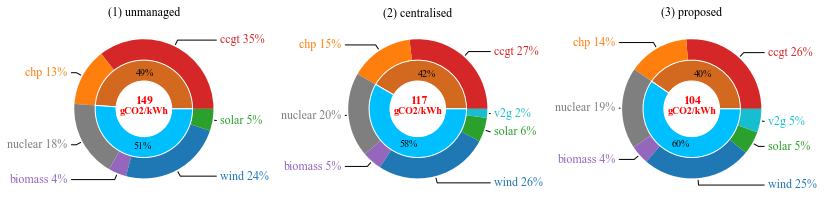

In [5]:
fig = plt.figure(figsize = (18,3.2))
grid = plt.GridSpec(1,3, wspace=-0.4, hspace=0.0)
size = 0.3
text1 = 12
text2 = 12
font1 = {'family': 'Times New Roman', 'weight': 'normal', 'size': text1}
font2 = {'family': 'Times New Roman', 'weight': 'normal', 'size': text2}

# Unmanageed
ax = fig.add_subplot(grid[0,0])
ccgt_tot, chp_tot, nuclear_tot, biomass_tot = Genmix_Umg[0], Genmix_Umg[1], Genmix_Umg[2], Genmix_Umg[3]
wind_tot, solar_tot = Genmix_Umg[4], Genmix_Umg[5]
data = {'ccgt':ccgt_tot, 'chp':chp_tot, 
        'nuclear':nuclear_tot, 'biomass':biomass_tot, 'wind':wind_tot, 'solar':solar_tot}
colors = ['tab:red', 'tab:orange', 'tab:gray', 'tab:purple', 'tab:blue', 'tab:green'] 
base_d = sum(list(data.values()))
final_data = {k:m/base_d*100 for k,m in data.items()}
recipe = list(final_data.keys())
data = list(final_data.values())
perc = [str(int(round(e / s * 100, 0))) + '%' for s in (sum(data),) for e in data]
wedges, texts = ax.pie(data, wedgeprops=dict(width=size), colors=colors)
kw = dict(arrowprops=dict(arrowstyle='-'), zorder=0, va='center')
for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2 + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(recipe[i] + ' ' + perc[i], 
                xy=(x, y), 
                xytext=(1.1*np.sign(x), 1.1*y), 
                fontsize=text1,
                color=colors[i],
                horizontalalignment=horizontalalignment, 
                **kw)   
data0 = [[ccgt_tot, chp_tot], [nuclear_tot, biomass_tot, wind_tot, solar_tot]]
class0 = ['fossil', 'res']
color0 = ['chocolate', 'deepskyblue']
sums = [sum(i) for i in data0]
plt.pie(sums, radius=1-size, colors=color0, wedgeprops=dict(width=size, edgecolor='w'), autopct='%1.0f%%', pctdistance=0.75)
#plt.pie(sums, radius=1-size, colors=color0, wedgeprops=dict(width=size, edgecolor='w'), autopct='%1.0f%%', 
#        pctdistance=0.75, labeldistance=0.5, labels=class0)
#plt.text(0.335, 0.692, class0[0], color='black', fontsize=text1, transform=ax.transAxes)
#plt.text(0.356, 0.275, class0[1], color='black', fontsize=text1, transform=ax.transAxes)
plt.text(0.452, 0.53, '149', weight='bold', color='red', fontsize=text2, transform=ax.transAxes)
plt.text(0.36, 0.47, 'gCO2/kWh', weight='bold', color='red', fontsize=text2-2, transform=ax.transAxes)
ax.set_title('(1) unmanaged', font2)

# Centralised
ax = fig.add_subplot(grid[0,1])
ccgt_tot, chp_tot, nuclear_tot, biomass_tot, = Genmix_Cen[0], Genmix_Cen[1], Genmix_Cen[2], Genmix_Cen[3]
wind_tot, solar_tot, v2g_tot = Genmix_Cen[4], Genmix_Cen[5], Genmix_Cen[6]
data = {'ccgt':ccgt_tot, 'chp':chp_tot, 
        'nuclear':nuclear_tot, 'biomass':biomass_tot, 'wind':wind_tot, 'solar':solar_tot, 'v2g':v2g_tot}
colors = ['tab:red', 'tab:orange', 'tab:gray', 'tab:purple', 'tab:blue', 'tab:green', 'tab:cyan']
base_d = sum(list(data.values()))
final_data = {k:m/base_d*100 for k,m in data.items()}
recipe = list(final_data.keys())
data = list(final_data.values())
perc = [str(int(round(e / s * 100, 0))) + '%' for s in (sum(data),) for e in data]
wedges, texts = ax.pie(data, wedgeprops=dict(width=size), colors=colors)
kw = dict(arrowprops=dict(arrowstyle='-'), zorder=0, va='center')
for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2 + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(recipe[i] + ' ' + perc[i], 
                xy=(x, y), 
                xytext=(1.1*np.sign(x), 1.1*y), 
                fontsize=text1,
                color=colors[i],
                horizontalalignment=horizontalalignment, 
                **kw)  
data0 = [[ccgt_tot, chp_tot], [nuclear_tot, biomass_tot, wind_tot, solar_tot,v2g_tot]]
class0 = ['fossil', 'res']
color0 = ['chocolate', 'deepskyblue']
sums = [sum(i) for i in data0]
plt.pie(sums, radius=1-size, colors=color0, wedgeprops=dict(width=size, edgecolor='w'), autopct='%1.0f%%', pctdistance=0.75)
#plt.pie(sums, radius=1-size, colors=color0, wedgeprops=dict(width=size, edgecolor='w'), autopct='%1.0f%%', 
#        pctdistance=0.75, labeldistance=0.5, labels=class0)
#plt.text(0.351, 0.692, class0[0], color='black', fontsize=text1, transform=ax.transAxes)
#plt.text(0.340, 0.284, class0[1], color='black', fontsize=text1, transform=ax.transAxes)
plt.text(0.455, 0.53, '117', weight='bold', color='red', fontsize=text2, transform=ax.transAxes)
plt.text(0.36, 0.47, 'gCO2/kWh', weight='bold', color='red', fontsize=text2-2, transform=ax.transAxes)
ax.set_title('(2) centralised', font2)
    
# Proposed
ax = fig.add_subplot(grid[0,2])
ccgt_tot, chp_tot, nuclear_tot, biomass_tot = Genmix_Pro[0], Genmix_Pro[1], Genmix_Pro[2], Genmix_Pro[3]
wind_tot, solar_tot, v2g_tot = Genmix_Pro[4], Genmix_Pro[5], Genmix_Pro[6]
data = {'ccgt':ccgt_tot, 'chp':chp_tot, 
        'nuclear':nuclear_tot, 'biomass':biomass_tot, 'wind':wind_tot, 'solar':solar_tot, 'v2g':v2g_tot}
colors = ['tab:red', 'tab:orange', 'tab:gray', 'tab:purple', 'tab:blue', 'tab:green', 'tab:cyan']
base_d = sum(list(data.values()))
final_data = {k:m/base_d*100 for k,m in data.items()}
recipe = list(final_data.keys())
data = list(final_data.values())
perc = [str(int(round(e / s * 100, 0))) + '%' for s in (sum(data),) for e in data]
wedges, texts = ax.pie(data, wedgeprops=dict(width=size), colors=colors)
kw = dict(arrowprops=dict(arrowstyle='-'), zorder=0, va='center')
for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2 + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(recipe[i] + ' ' + perc[i], 
                xy=(x, y), 
                xytext=(1.1*np.sign(x), 1.1*y), 
                fontsize=text1,
                color=colors[i],
                horizontalalignment=horizontalalignment, 
                **kw)
data0 = [[ccgt_tot, chp_tot], [nuclear_tot, biomass_tot, wind_tot, solar_tot,v2g_tot]]
class0 = ['fossil', 'res']
color0 = ['chocolate', 'deepskyblue']
sums = [sum(i) for i in data0]
#plt.pie(sums, radius=1-size, colors=color0, wedgeprops=dict(width=size, edgecolor='w'), autopct='%1.0f%%', 
#        pctdistance=0.75, labeldistance=0.5, labels=class0)
plt.pie(sums, radius=1-size, colors=color0, wedgeprops=dict(width=size, edgecolor='w'), autopct='%1.0f%%', pctdistance=0.75)
#plt.text(0.362, 0.685, 'fossil', color='black', fontsize=text1, transform=ax.transAxes)
#plt.text(0.330, 0.286, 'res', color='black', fontsize=text1, transform=ax.transAxes)
plt.text(0.45, 0.53, '104', weight='bold', color='red', fontsize=text2, transform=ax.transAxes)
plt.text(0.36, 0.47, 'gCO2/kWh', weight='bold', color='red', fontsize=text2-2, transform=ax.transAxes)
ax.set_title('(3) proposed', font2)

plt.savefig('GenMix.pdf', bbox_inches='tight')
plt.show()

# Carbon Intensity

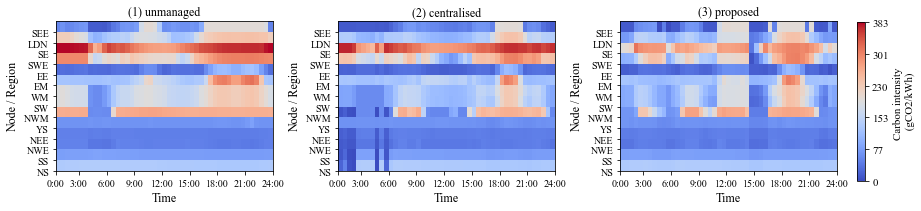

In [6]:
import matplotlib.colors as colors
fig = plt.figure(figsize=(14, 2.75))
grid = plt.GridSpec(1,3, wspace=0.3, hspace=0.0)
text1 = 11
text2 = 10
font1 = {'family': 'Times New Roman', 'weight': 'normal', 'size': text1}
cmap = plt.get_cmap('coolwarm')

# get value range
vmin = min(np.min(Carbon_Umg), np.min(Carbon_Cen), np.min(Carbon_Pro))
vmax = max(np.max(Carbon_Umg), np.max(Carbon_Cen), np.max(Carbon_Pro))
norm = colors.Normalize(vmin=vmin, vmax=vmax)

# unmanged
ax1 = fig.add_subplot(grid[0,0])
cmap_data1 = ax1.pcolormesh(Carbon_Umg, norm=norm, cmap=cmap)
plt.tick_params(labelsize = text2)
plt.xticks(np.linspace(0,47,11), fontname = "Times New Roman")
plt.xticks([0,5,11,17,23,29,35,41,47],['0:00','3:00','6:00','9:00','12:00','15:00','18:00','21:00','24:00'])
plt.yticks(np.linspace(0,13,14), fontname = "Times New Roman")
#plt.yticks([0,2,4,6,8,10,12],[1,3,5,7,9,11,13])
plt.yticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13],
           ['NS', 'SS', 'NWE', 'NEE', 'YS', 'NWM', 'SW', 'WM', 'EM', 'EE', 'SWE', 'SE', 'LDN', 'SEE'])
ax1.set_xlim (0,47)
ax1.set_ylim (0,14)
ax1.set_xlabel('Time', font2)
ax1.set_ylabel('Node / Region', font2)
ax1.set_title('(1) unmanaged', font2)

# No Recharge
ax2 = fig.add_subplot(grid[0,1])
cmap_data2 = ax2.pcolormesh(Carbon_Cen, norm=norm, cmap=cmap)
plt.tick_params(labelsize = text2)
plt.xticks(np.linspace(0,47,11), fontname = "Times New Roman")
plt.xticks([0,5,11,17,23,29,35,41,47],['0:00','3:00','6:00','9:00','12:00','15:00','18:00','21:00','24:00'])
plt.yticks(np.linspace(0,13,14), fontname = "Times New Roman")
#plt.yticks([0,2,4,6,8,10,12],[1,3,5,7,9,11,13])
plt.yticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13],
           ['NS', 'SS', 'NWE', 'NEE', 'YS', 'NWM', 'SW', 'WM', 'EM', 'EE', 'SWE', 'SE', 'LDN', 'SEE'])
ax2.set_xlim (0,47)
ax2.set_ylim (0,14)
ax2.set_xlabel('Time', font2)
ax2.set_ylabel('Node / Region', font2)
ax2.set_title('(2) centralised', font2)
    
# EV Recharge
ax3 = fig.add_subplot(grid[0,2])
cmap_data3 = ax3.pcolormesh(Carbon_Pro, norm=norm, cmap=cmap)
plt.tick_params(labelsize = text2)
plt.xticks(np.linspace(0,47,11), fontname = "Times New Roman")
plt.xticks([0,5,11,17,23,29,35,41,47],['0:00','3:00','6:00','9:00','12:00','15:00','18:00','21:00','24:00'])
plt.yticks(np.linspace(0,13,14), fontname = "Times New Roman")
plt.yticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13],
           ['NS', 'SS', 'NWE', 'NEE', 'YS', 'NWM', 'SW', 'WM', 'EM', 'EE', 'SWE', 'SE', 'LDN', 'SEE'])
ax3.set_xlim (0,47)
ax3.set_ylim (0,14)
ax3.set_xlabel('Time', font2)
ax3.set_ylabel('Node / Region', font2)
ax3.set_title('(3) proposed', font2)

cax = fig.add_axes([0.92,0.075, 0.008,0.80])
cb = fig.colorbar(cmap_data1, cax=cax, ax=[ax1, ax2, ax3], orientation='vertical', label='Carbon intensity (gCO2/kWh)')
cb.set_label('Carbon intensity \n (gCO2/kWh)', fontdict=font1)
cb.ax.tick_params(labelsize=text1)  
cb.set_ticks(np.linspace(vmin,vmax,6))
cb.set_ticklabels(['0','77','153','230','301','383'], fontname = 'Times New Roman') 
    
plt.savefig('Carbon.pdf', bbox_inches='tight')
plt.show()

In [7]:
print('CI Unmanaged:  ', np.mean(Carbon_Umg))
print('CI Centralised:', np.mean(Carbon_Cen))
print('CI Proposed:   ', np.mean(Carbon_Pro))
print('')
print('benefit to unmanaged:', (np.mean(Carbon_Pro)-np.mean(Carbon_Umg))/np.mean(Carbon_Umg)*100)
print('benefit to centralised:', (np.mean(Carbon_Pro)-np.mean(Carbon_Cen))/np.mean(Carbon_Cen)*100)

CI Unmanaged:   148.69779034105193
CI Centralised: 117.16638055788123
CI Proposed:    117.51314109245475

benefit to unmanaged: -20.971830971443726
benefit to centralised: 0.29595565973996835


# 2035 & 2050

In [8]:
Genmix_2030 = pd.read_excel('result_2030.xlsx', 'genmix').values[:,0]
Carbon_2030 = pd.read_excel('result_2030.xlsx', 'carbon').values
Genmix_2050 = pd.read_excel('result_2050.xlsx', 'genmix').values[:,0]
Carbon_2050 = pd.read_excel('result_2050.xlsx', 'carbon').values
print(np.mean(Carbon_2030))
print(np.mean(Carbon_2050))

42.62658874924881
30.545687112608178


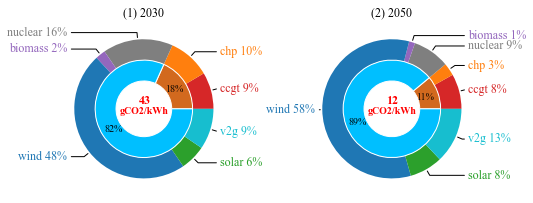

In [49]:
fig = plt.figure(figsize = (10,3.2))
grid = plt.GridSpec(1,2, wspace=-0.2, hspace=0.0)
size = 0.3
text1 = 12
text2 = 12
font1 = {'family': 'Times New Roman', 'weight': 'normal', 'size': text1}
font2 = {'family': 'Times New Roman', 'weight': 'normal', 'size': text2}

# Centralised
ax = fig.add_subplot(grid[0,0])
ccgt_tot, chp_tot, nuclear_tot, biomass_tot, = Genmix_2030[0], Genmix_2030[1], Genmix_2030[2], Genmix_2030[3]
wind_tot, solar_tot, v2g_tot = Genmix_2030[4], Genmix_2030[5], Genmix_2030[6]
data = {'ccgt':ccgt_tot, 'chp':chp_tot, 
        'nuclear':nuclear_tot, 'biomass':biomass_tot, 'wind':wind_tot, 'solar':solar_tot, 'v2g':v2g_tot}
colors = ['tab:red', 'tab:orange', 'tab:gray', 'tab:purple', 'tab:blue', 'tab:green', 'tab:cyan']
base_d = sum(list(data.values()))
final_data = {k:m/base_d*100 for k,m in data.items()}
recipe = list(final_data.keys())
data = list(final_data.values())
perc = [str(int(round(e / s * 100, 0))) + '%' for s in (sum(data),) for e in data]
wedges, texts = ax.pie(data, wedgeprops=dict(width=size), colors=colors)
kw = dict(arrowprops=dict(arrowstyle='-'), zorder=0, va='center')
for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2 + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(recipe[i] + ' ' + perc[i], 
                xy=(x, y), 
                xytext=(1.1*np.sign(x), 1.1*y), 
                fontsize=text1,
                color=colors[i],
                horizontalalignment=horizontalalignment, 
                **kw)
data0 = [[ccgt_tot, chp_tot], [nuclear_tot, biomass_tot, wind_tot, solar_tot,v2g_tot]]
class0 = ['fossil', 'res']
color0 = ['chocolate', 'deepskyblue']
sums = [sum(i) for i in data0]
plt.pie(sums, radius=1-size, colors=color0, wedgeprops=dict(width=size, edgecolor='w'), autopct='%1.0f%%', pctdistance=0.75)
plt.text(0.47, 0.53, '43', weight='bold', color='red', fontsize=text2, transform=ax.transAxes)
plt.text(0.36, 0.47, 'gCO2/kWh', weight='bold', color='red', fontsize=text2-2, transform=ax.transAxes)
ax.set_title('(1) 2030', font2)
    
# Proposed
ax = fig.add_subplot(grid[0,1])
ccgt_tot, chp_tot, nuclear_tot, biomass_tot, = Genmix_2050[0], Genmix_2050[1], Genmix_2050[2], Genmix_2050[3]
wind_tot, solar_tot, v2g_tot = Genmix_2050[4], Genmix_2050[5], Genmix_2050[6]
data = {'ccgt':ccgt_tot, 'chp':chp_tot, 
        'nuclear':nuclear_tot, 'biomass':biomass_tot, 'wind':wind_tot, 'solar':solar_tot, 'v2g':v2g_tot}
colors = ['tab:red', 'tab:orange', 'tab:gray', 'tab:purple', 'tab:blue', 'tab:green', 'tab:cyan']
base_d = sum(list(data.values()))
final_data = {k:m/base_d*100 for k,m in data.items()}
recipe = list(final_data.keys())
data = list(final_data.values())
perc = [str(int(round(e / s * 100, 0))) + '%' for s in (sum(data),) for e in data]
wedges, texts = ax.pie(data, wedgeprops=dict(width=size), colors=colors)
kw = dict(arrowprops=dict(arrowstyle='-'), zorder=0, va='center')
for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2 + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(recipe[i] + ' ' + perc[i], 
                xy=(x, y), 
                xytext=(1.1*np.sign(x), 1.1*y), 
                fontsize=text1,
                color=colors[i],
                horizontalalignment=horizontalalignment, 
                **kw)
data0 = [[ccgt_tot, chp_tot], [nuclear_tot, biomass_tot, wind_tot, solar_tot,v2g_tot]]
class0 = ['fossil', 'res']
color0 = ['chocolate', 'deepskyblue']
sums = [sum(i) for i in data0]
plt.pie(sums, radius=1-size, colors=color0, wedgeprops=dict(width=size, edgecolor='w'), autopct='%1.0f%%', pctdistance=0.75)
plt.text(0.47, 0.53, '12', weight='bold', color='red', fontsize=text2, transform=ax.transAxes)
plt.text(0.36, 0.47, 'gCO2/kWh', weight='bold', color='red', fontsize=text2-2, transform=ax.transAxes)
ax.set_title('(2) 2050', font2)

plt.savefig('Future.pdf', bbox_inches='tight')
plt.show()

# Convergence

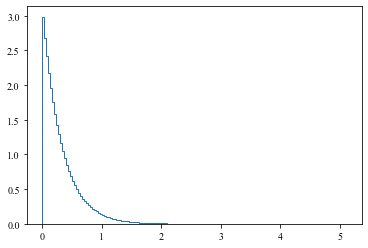

In [10]:
import matplotlib.pyplot as plt
import numpy as np
import random as random

random.seed(0)

def gen(a):
    y = np.random.rand() #random()
    return( -np.log( y ) / a )

def dist_func( x, a ):
    return( a * np.exp( -a * x) )

data = [ gen(3.14) for x in range(10000000) ]
fig = plt.figure()
ax = fig.add_subplot( 1, 1, 1 )
CI_datahist = ax.hist(data, density=True, bins=153, histtype="step") 
plt.show()

In [11]:
NCI_Final = []
for i in range(len(CI_datahist[0])):
    if i < len(CI_datahist[0]) - 1:
        if CI_datahist[0][i] > CI_datahist[0][i+1]:
            NCI_Final.append(CI_datahist[0][i])

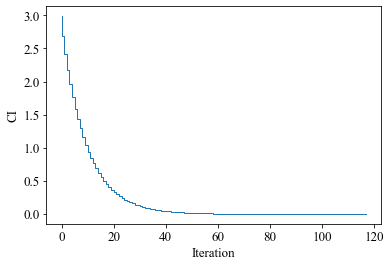

In [12]:
x = range(len(NCI_Final))
text1 = 13
font1 = {'family': 'Times New Roman', 'weight': 'normal', 'size': text1}
plt.step(x, NCI_Final, linewidth=1, label='CI')
plt.tick_params(labelsize = text1)
plt.xlabel('Iteration', font1)
plt.ylabel("CI", font1)
plt.show()

In [13]:
old_min, old_max = np.min(np.array(NCI_Final)[:83]), np.max(np.array(NCI_Final)[:83])
new_min, new_max = 103.94, 126.18912781135536
NCI_norm = []
for r in range(83):
    old_value = np.array(NCI_Final)[:83][r]
    NCI_norm.append( ( (old_value - old_min) / (old_max - old_min) ) * (new_max - new_min) + new_min )

C:\Users\Dawei Qiu\anaconda3\lib\site-packages\ipykernel_launcher.py:11: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  # This is added back by InteractiveShellApp.init_path()


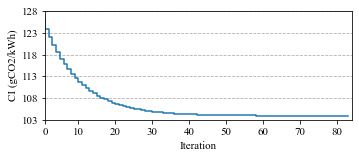

In [41]:
fig = plt.figure(figsize = (5.5,2))
ax = plt.subplot(111)
x = range(83)
line_width = 01.5
space = 0.4
text1 = 10
text2 = 11
font1 = {'family': 'Times New Roman', 'weight': 'normal', 'size': text1}
font2 = {'family': 'Times New Roman', 'weight': 'normal', 'size': text2}
ax.step(x, NCI_norm, linewidth=line_width)
ax.grid(b=None, which='major', linestyle='--', axis='y')
ax.tick_params(labelsize = text2)
#plt.xticks(np.linspace(0,83,10), fontname = "Times New Roman")
plt.xticks([0,9,19,29,39,49,59,69,79],['0','10','20','30','40','50','60','70','80'])
plt.yticks(np.linspace(103,128,6), fontname = "Times New Roman")
plt.xlim([0,83])
plt.ylim([103,128])
plt.ylabel('CI (gCO2/kWh)', font2)
plt.xlabel('Iteration', font2) 

# from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes, mark_inset
# axins = zoomed_inset_axes(ax, zoom=1.5, loc='right')
# axins.plot(NCI_norm)
# x1, x2, y1, y2 = 50, 83, 103.5, 105
# axins.set_xlim(x1,x2)
# axins.set_ylim(y1,y2)
# mark_inset(ax, axins, loc1=4, loc2=3)

plt.savefig('NCI_Iteration.pdf', bbox_inches='tight')
plt.show()

In [17]:
NCI_norm

[126.18912781135536,
 123.91368384394282,
 121.95504219275703,
 120.14416273261986,
 118.51871164913098,
 117.06942310528756,
 115.77434934741764,
 114.60462115324474,
 113.55892121100219,
 112.58192242648951,
 111.73707903768806,
 110.96042327830071,
 110.26291786150433,
 109.61564891038633,
 109.05257627574525,
 108.54351342353792,
 108.09321607251522,
 107.68572019025048,
 107.28693196203665,
 106.96646796564491,
 106.65234492758768,
 106.40176543678403,
 106.1592684351251,
 105.93271313857475,
 105.7400953655049,
 105.55102763600965,
 105.38817217793945,
 105.26159861174808,
 105.11501976855769,
 104.99257675621097,
 104.90328981121198,
 104.79982501923264,
 104.71779445260941,
 104.63134307700648,
 104.56467370522178,
 104.50539467572132,
 104.44301214900784,
 104.39119044374587,
 104.35671706463147,
 104.30915987712262,
 104.27651733809074,
 104.24222257752098,
 104.20922280139982,
 104.18408224124256,
 104.15778066054519,
 104.13692694545915,
 104.11801570704601,
 104.1004441077